<a href="https://colab.research.google.com/github/elnrdfrs/article_frontiers_notebook/blob/main/norm_intensite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
#!pip install napari
import nibabel as nib
import napari
import numpy as np

from scipy.ndimage import median_filter,uniform_filter
from scipy.stats import median_abs_deviation
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
import nibabel as nib
import numpy as np

from scipy.ndimage import median_filter,uniform_filter,gaussian_filter

def diffbiaisFieldCorrection(file1,file2,outputfile1,outputfile2,sizeFilter=11,typefilter="median") :
    im1=nib.load(file1)
    im2=nib.load(file2)
    v1=im1.get_fdata()
    v2=im2.get_fdata()
    logdiff=np.log(v1.clip(1))-np.log(v2.clip(1))
    if typefilter=="uniform" :
        med=uniform_filter(logdiff, size=(sizeFilter,sizeFilter,sizeFilter))
    elif typefilter=="gaussian" :
        med=gaussian_filter(logdiff, sigma=(sizeFilter,sizeFilter,sizeFilter))   
    else :
        med=median_filter(logdiff, size=(sizeFilter,sizeFilter,sizeFilter))
    b1b2=np.exp(med)
    sqrtb1b2=np.sqrt(b1b2)
    corr1=np.divide(v1,sqrtb1b2)
    corr2=np.multiply(v2,sqrtb1b2)
    imres1=nib.Nifti1Image(corr1, im1.affine, im1.header)
    imres1.to_filename(outputfile1)
    imres2=nib.Nifti1Image(corr2, im2.affine, im2.header)
    imres2.to_filename(outputfile2)

In [4]:
i1path = "/content/drive/MyDrive/essais_norm_intensite/t1corrected.nii.gz"
i2path = "/content/drive/MyDrive/essais_norm_intensite/t2corrected.nii.gz"
im1=nib.load(i1path).get_fdata()
im2=nib.load(i2path).get_fdata()

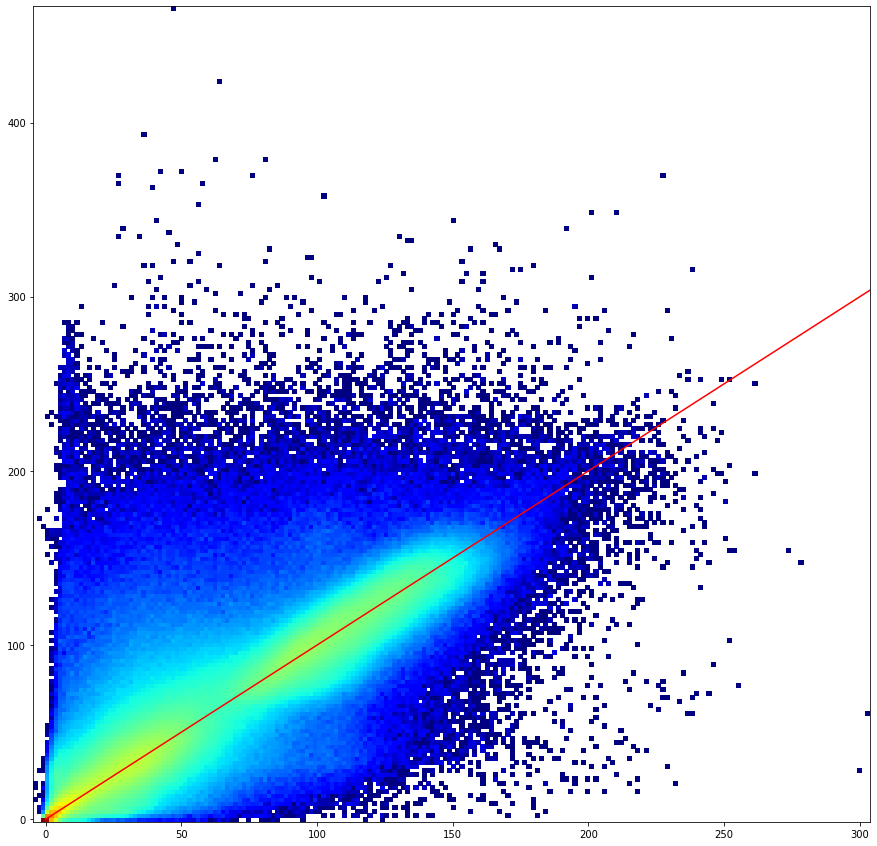

In [7]:
from matplotlib.colors import LogNorm
plt.figure(figsize=(15, 15))
plt.hist2d(im2.flatten(),im1.flatten(),bins=(200,200), cmap=plt.cm.jet, norm=LogNorm())
plt.plot([0,500],[0,500],'r')

In [9]:
!pip install mlinsights
from sklearn.isotonic import IsotonicRegression
from mlinsights.mlmodel import PiecewiseRegressor
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=5, include_bias=False)

polyRegression=False 

subsample=1
X=im2.flatten()[::subsample].reshape(-1, 1)
y=im1.flatten()[::subsample]

model = IsotonicRegression()

#model = PiecewiseRegressor(verbose=True, binner=KBinsDiscretizer(n_bins=10))

#model = LinearRegression()

if polyRegression :
    X=poly.fit_transform(X)

model.fit(X, y)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 35.3 MB/s 
     |████████████████████████████████| 126 kB 80.6 MB/s 


IsotonicRegression()

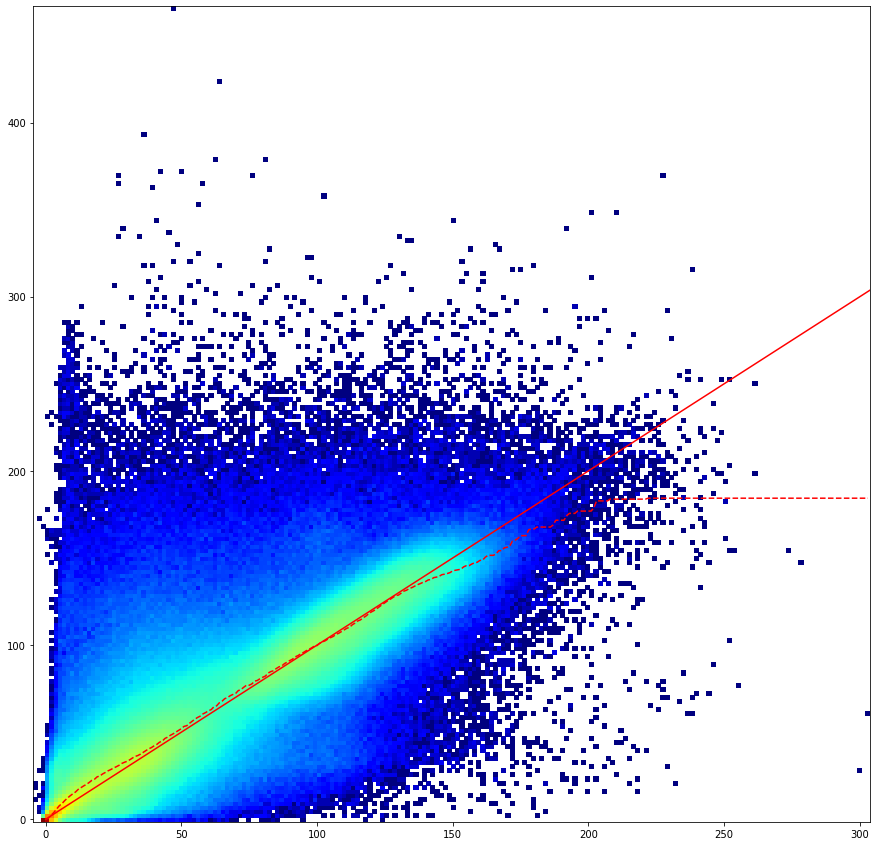

In [24]:
plt.figure(figsize=(15,15))

plt.hist2d(im2.flatten(),im1.flatten(),bins=(200,200), cmap=plt.cm.jet, norm=LogNorm())
plt.plot([0,500],[0,500],'r')
X=np.arange(0,500).reshape(-1, 1)
if polyRegression :
    X=poly.fit_transform(X)
plt.plot(np.arange(0,500), model.predict(X),'r--')

In [25]:
X=im2.flatten().reshape(-1, 1)
if polyRegression :
    X=poly.transform(X)
im2norm=(model.predict(X)).reshape(im2.shape)


In [17]:
!pip install PyQt5

viewer = napari.view_image(np.power(im1-im2,2),name="withoutNorm",colormap='turbo',contrast_limits=[0,1000])
viewer.add_image(np.power(im1-im2norm,2),name="Norm",colormap='turbo',contrast_limits=[0,1000])


napari.run()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


ModuleNotFoundError: ignored

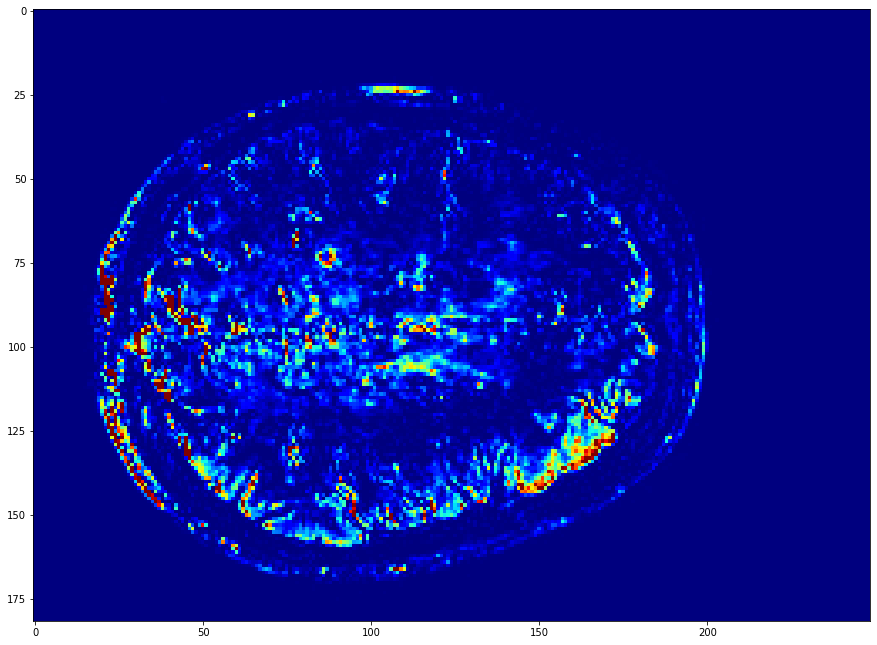

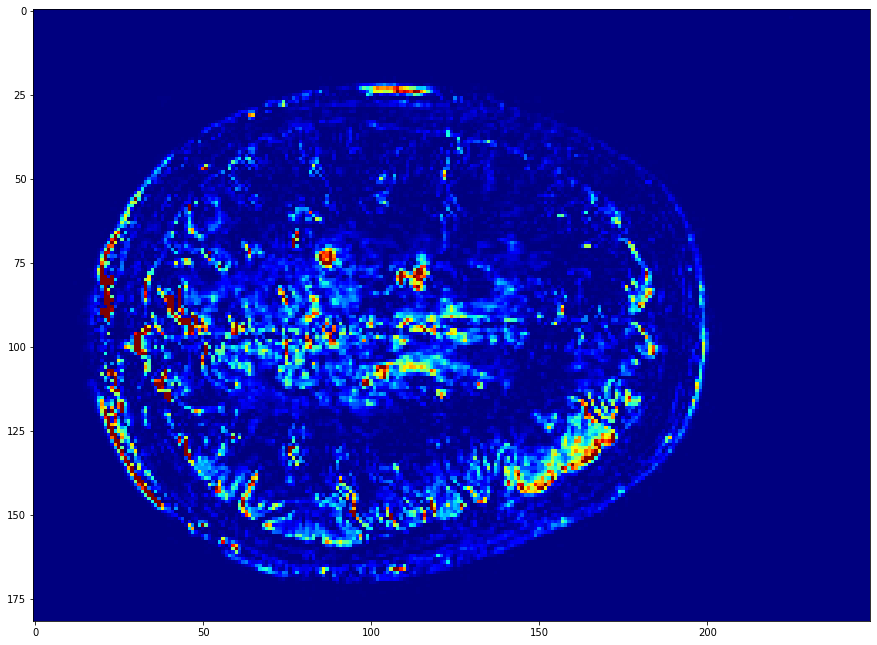

In [26]:
plt.figure(figsize=(15,15))
plt.imshow(np.power(im1-im2,2)[:,:,150],cmap='jet', vmin=0, vmax=1000)
plt.show()
plt.figure(figsize=(15,15))
plt.imshow(np.power(im1-im2norm,2)[:,:,150],cmap='jet', vmin=0, vmax=1000)
plt.show()